| **Inicio** | **atrás 3** | **Siguiente 5** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./3.Clasificacion.ipynb)| [⏩](./5.Reglas_de_Asociacion.ipynb)|

# **4. Clustering**

## **K-Means**

`K-Means` es un algoritmo de aprendizaje no supervisado utilizado para agrupar datos en grupos o clústeres. El objetivo es encontrar patrones en los datos sin tener etiquetas de clasificación predefinidas. El algoritmo funciona dividiendo los datos en `k` grupos, donde `k` es un número predeterminado de grupos que se desea obtener. Cada grupo tiene un centroide, que se calcula como la media de los datos que pertenecen a ese grupo. Los puntos de datos se asignan a los grupos en función de su distancia al centroide más cercano.

El algoritmo `K-Means` sigue los siguientes pasos:

1. Selecciona el número de clústeres `K` que se desea obtener.
2. Inicializa los centroides de cada clúster aleatoriamente.
3. Asigna cada punto de datos al clúster cuyo centroide está más cercano.
4. Recalcula los centroides de cada clúster.
5. Repite los pasos 3 y 4 hasta que se alcance un criterio de convergencia.

Para implementar `K-Means` en Python, podemos utilizar la biblioteca `scikit-learn`. En el siguiente ejemplo, generamos aleatoriamente algunos datos y los agrupamos en 3 clústeres usando el algoritmo `K-Means`.

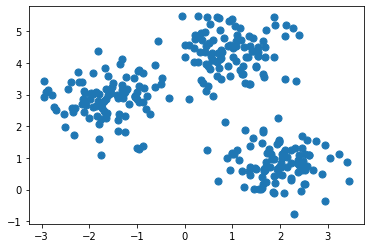

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8c8d88e160>
Traceback (most recent call last):
  File "/home/puma/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/puma/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/puma/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/puma/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in

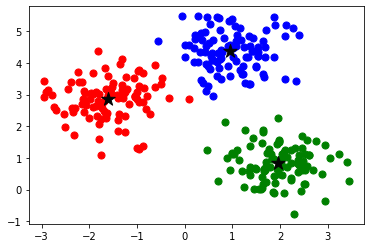

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generar datos aleatorios
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

# Inicializar el modelo K-Means
kmeans = KMeans(n_clusters=3)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener las etiquetas de los clústeres
labels = kmeans.predict(X)

# Obtener los centroides de los clústeres
centroids = kmeans.cluster_centers_

# Visualizar los clústeres y los centroides
colors = ['r', 'g', 'b']
for i in range(len(colors)):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=colors[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.show()

El resultado del código anterior es una gráfica que muestra los puntos de datos agrupados en 3 clústeres y los centroides de cada clúster

Como se puede ver en la imagen, `K-Means` ha agrupado los datos en 3 clústeres, cada uno con su propio centroide.

Es importante tener en cuenta que el número de clústeres `K` debe ser elegido cuidadosamente para obtener resultados significativos. Si `K` es demasiado pequeño, algunos patrones en los datos pueden perderse. Si `K` es demasiado grande, los clústeres pueden no tener un significado real. Una forma de encontrar el número óptimo de clústeres es mediante el uso de la técnica del codo (elbow method), que se basa en la suma de cuadrados de las distancias dentro de los clústeres (inertia)

## **Clustering Jerárquico**

El clustering jerárquico es una técnica de agrupamiento que busca dividir un conjunto de datos en grupos (o clusters) de manera que los elementos dentro de cada grupo sean similares entre sí y diferentes de los elementos en los otros grupos. El clustering jerárquico se llama así porque los grupos se forman en una jerarquía, es decir, en un árbol con ramas y subramas que representan diferentes niveles de similitud entre los grupos.

Existen dos tipos de clustering jerárquico: el `aglomerativo` y el `divisivo`.

* En el aglomerativo, cada elemento comienza siendo un grupo y se van uniendo los grupos más similares hasta que todos los elementos quedan en un solo grupo.

*  En el divisivo, se parte de un solo grupo y se van dividiendo en grupos más pequeños hasta que cada elemento es un grupo.

A continuación, se muestra un ejemplo de cómo realizar clustering jerárquico aglomerativo en Python utilizando la librería scikit-learn y se graficará el dendrograma resultante:

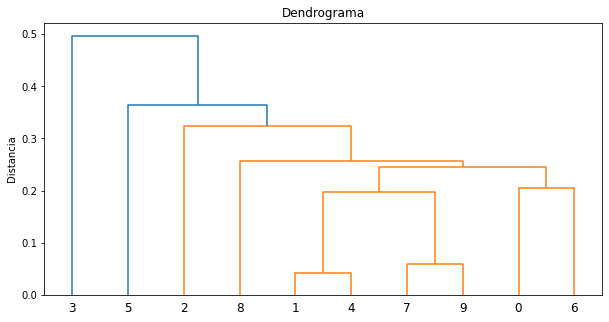

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generar datos aleatorios
X = np.random.rand(10, 2)

# Realizar clustering jerárquico
Z = linkage(X, 'single')

# Graficar dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma')
plt.ylabel('Distancia')
plt.show()

En este ejemplo, se generan `10` puntos aleatorios en un espacio bidimensional y se aplica el algoritmo de clustering jerárquico utilizando la métrica de distancia `"single"`, que se refiere a la distancia mínima entre los puntos de dos clusters diferentes. Luego, se grafica el `dendrograma` resultante, que muestra la jerarquía de clusters formados y la distancia entre ellos.

En resumen, el clustering jerárquico es una técnica útil para dividir un conjunto de datos en grupos de manera jerárquica, lo que puede ser útil para identificar patrones y relaciones en los datos.

A continuación, se presenta un ejemplo de clustering jerárquico aglomerativo en Python utilizando el conjunto de datos de `iris`.

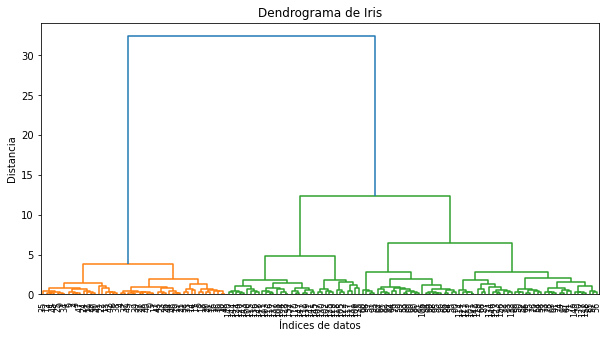

In [3]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# cargar los datos
iris = load_iris()
X = iris.data

# calcular la matriz de distancia
Z = linkage(X, 'ward')

# mostrar el dendrograma
plt.figure(figsize=(10, 5))
plt.title('Dendrograma de Iris')
plt.xlabel('Índices de datos')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

En este ejemplo, cargamos los datos de `iris` y luego calculamos la matriz de distancia utilizando el método de enlace `"ward"`. Luego, mostramos el dendrograma utilizando la función `dendrogram()` de `scipy`.

El dendrograma es una representación gráfica de la agrupación jerárquica. En el dendrograma, los puntos de datos se muestran en la parte inferior y las uniones de los grupos se muestran en los niveles superiores. La altura de cada unión representa la distancia entre los grupos que se están uniendo.

En general, el clustering jerárquico es un algoritmo útil para explorar patrones en los datos y encontrar grupos de datos similares. El dendrograma puede ser una herramienta útil para visualizar la estructura jerárquica de los datos y ayudar a tomar decisiones sobre el número de grupos que deben utilizarse en un análisis posterior.

| **Inicio** | **atrás 3** | **Siguiente 5** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./3.Clasificacion.ipynb)| [⏩](./5.Reglas_de_Asociacion.ipynb)|